# Exercise 04


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [3]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

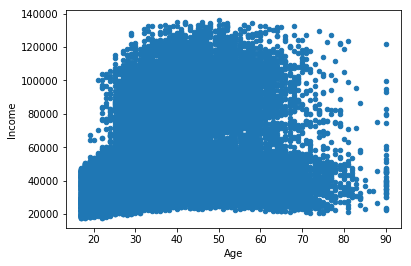

In [4]:
income.plot(x='Age', y='Income', kind='scatter')

In [6]:
# What is the relation between the age and Income?
x=np.array(income[['Age']])
linreg = LinearRegression()
linearm=linreg.fit(x, income['Income'])
print([linearm.coef_, linearm.intercept_])
#Según el coeficiente que acompaña a la edad, se puede observar que un año adicional en la edad, aumenta el ingreso en $542

[array([542.16765707]), 32538.088130868626]


In [51]:
#For a one percent increase in the Age how much the income increases?
L_x=np.log(np.array(income[['Age']]))
loglinreg = LinearRegression()
loglinreg.fit(L_x, income['Income'])
print([loglinreg.coef_, loglinreg.intercept_])
#Estimando un modelo de la forma lin-log, se tiene que un cambio de 1% en la edad, afecta los ingresos en 238.67

[array([23867.16759366]), -32212.038038454142]


In [27]:
#Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years
y30=linearm.predict(np.array([[30]]))
print(y30)

[48803.11784304]


In [29]:
y40=linearm.predict(np.array([[40]]))
print(y40)

[54224.79441376]


# Exercise 4.2
Evaluate the model using the MSE

In [143]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
y_pred=linearm.predict(x)
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred))

MSE: 593783043.8402299



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [58]:
income['Age2'] = income['Age'] ** 2
linreg2 = LinearRegression()
linreg2.fit(income[['Age', 'Age2']], income['Income'])
print([linreg2.coef_, linreg2.intercept_])

[array([3131.77014151,  -30.54341041]), -16225.070974074297]


# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [156]:
income['Sex1']=income['Sex'].astype(bool)
vs=['Age', 'Age2', 'Sex', 'Education-Num','Hours per week']
x2=income[vs]
linreg3 = LinearRegression()
linreg3.fit(x2, income['Income'])
print([linreg3.coef_, linreg3.intercept_])

[array([ 1.90102516e+03, -1.71842943e+01, -2.06041961e+04,  3.76548970e+03,
        1.45018596e+02]), -28119.189722553878]


In [159]:
y_pred2=linreg3.predict(x2)
print('MSE:', metrics.mean_squared_error(income['Income'], y_pred2))

MSE: 349400192.9351124


In [ ]:
#Juzgando únicamente por error cuadrático medio de cada regresión, se tiene que el promedio de los 
#errores al cuadrado del modelo que únicamente está conformado por la edad 
#y la edad al cuadrado son considerablemente mayores que el modelo con más variables. 
#De esto se puede inferir que existían errores en la estimación, probablemente por variables omitidas

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [7]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [68]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


In [8]:
data['Churn?']=data['Churn?'].replace(['False.', 'true.'], [0,1])
data['Churn?']=data['Churn?'].astype(bool)
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [9]:
data['Churn?'].value_counts()

False    2850
True      483
Name: Churn?, dtype: int64

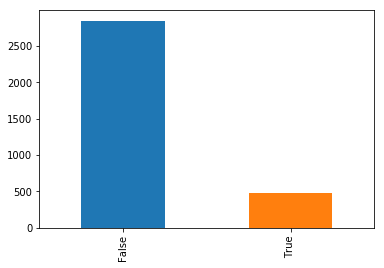

In [10]:
data['Churn?'].value_counts().plot(kind='bar')

In [ ]:
#se tiene que el 85.5% de los churners son falsos, mientras que tan solo el 14.5% son verdaderos. 
#Lo anterior corresponde a una distribución binomial

In [11]:
from sklearn.model_selection import train_test_split
X=data
y=data['Churn?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_test

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
3224,IN,115,415,370-9622,no,no,0,226.4,101,38.49,...,60,23.53,213.4,82,9.60,12.3,4,3.32,3,True
370,NC,135,415,383-7689,no,no,0,201.8,81,34.31,...,114,19.13,204.4,82,9.20,10.3,6,2.78,1,False
2355,ND,118,408,419-3427,no,no,0,224.6,94,38.18,...,120,19.20,269.0,105,12.11,12.5,8,3.38,2,False
1400,VA,115,415,367-3971,no,no,0,132.0,90,22.44,...,75,16.79,175.8,114,7.91,0.0,0,0.00,3,False
2248,CT,152,408,354-7077,no,yes,20,239.1,105,40.65,...,111,17.77,268.2,130,12.07,13.3,3,3.59,5,False
1139,IL,127,510,353-3285,no,no,0,220.2,108,37.43,...,124,16.01,172.7,113,7.77,11.7,3,3.16,2,False
559,CO,125,415,378-9029,no,no,0,131.8,97,22.41,...,100,11.62,308.2,119,13.87,7.7,6,2.08,2,False
1001,TN,140,415,372-3987,no,no,0,125.3,84,21.30,...,121,14.25,260.6,94,11.73,8.4,4,2.27,1,False
1329,AZ,137,415,370-4395,no,no,0,141.1,91,23.99,...,100,12.51,254.7,75,11.46,8.0,7,2.16,2,False
2100,NY,112,408,396-7687,no,yes,30,60.6,113,10.30,...,96,14.10,132.8,99,5.98,13.3,7,3.59,0,False


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

In [99]:
list(data)

['State',
 'Account Length',
 'Area Code',
 'Phone',
 "Int'l Plan",
 'VMail Plan',
 'VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'CustServ Calls',
 'Churn?']

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='sag',C=1e9)
variables = ['Intl Charge', 'CustServ Calls']
X_ = X_train[variables]
y_ = y_train
logreg.fit(X_, y_)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='sag', tol=0.0001, verbose=0, warm_start=False)

In [13]:
y_pred3 = logreg.predict(X_test[variables])

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


In [14]:
#Create a confusion matrix using the prediction on the 30% set.
from sklearn.metrics import confusion_matrix
cmatrix = pd.DataFrame(confusion_matrix(y_test, y_pred3))
cmatrix

,0,1
0,845,0
1,154,1


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred3)

0.846

In [ ]:
#El modelo calculado tiene 846 predicciones correctas, y 154 predicciones incorrectas 